In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("../../../../Datasets/ML/student-mat.csv", sep=';')

In [2]:
print(df.shape)
print(df.info())
print(df.describe())

(395, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
student_data_description = {    
    "school": {"type": "Categorical", "range/values": ["GP", "MS"], "description": "Student's school (GP: Gabriel Pereira, MS: Mousinho da Silveira)"},
    "sex": {"type": "Categorical", "range/values": ["F", "M"], "description": "Student's gender (F: female, M: male)"},
    "age": {"type": "Numeric", "range/values": "15–22", "description": "Student's age in years"},
    "address": {"type": "Categorical", "range/values": ["U", "R"], "description": "Home address type (U: urban, R: rural)"},
    "famsize": {"type": "Categorical", "range/values": ["LE3", "GT3"], "description": "Family size (LE3: ≤3 members, GT3: >3 members)"},
    "Pstatus": {"type": "Categorical", "range/values": ["T", "A"], "description": "Parent’s cohabitation status (T: together, A: apart)"},
    "Medu": {"type": "Numeric (ordinal)", "range/values": "0–4", "description": "Mother’s education (0: none, 4: higher education)"},
    "Fedu": {"type": "Numeric (ordinal)", "range/values": "0–4", "description": "Father’s education (0: none, 4: higher education)"},
    "Mjob": {"type": "Categorical", "range/values": ["teacher", "health", "services", "at_home", "other"], "description": "Mother’s job"},
    "Fjob": {"type": "Categorical", "range/values": ["teacher", "health", "services", "at_home", "other"], "description": "Father’s job"},
    "reason": {"type": "Categorical", "range/values": ["home", "reputation", "course", "other"], "description": "Reason to choose this school"},
    "guardian": {"type": "Categorical", "range/values": ["mother", "father", "other"], "description": "Student’s guardian"},
    "traveltime": {"type": "Numeric (ordinal)", "range/values": "1–4", "description": "Home to school travel time (1: <15min, 4: >1hr)"},
    "studytime": {"type": "Numeric (ordinal)", "range/values": "1–4", "description": "Weekly study time (1: <2hr, 4: >10hr)"},
    "failures": {"type": "Numeric", "range/values": "0–3", "description": "Number of past class failures"},
    "schoolsup": {"type": "Binary", "range/values": ["yes", "no"], "description": "Extra educational school support"},
    "famsup": {"type": "Binary", "range/values": ["yes", "no"], "description": "Family educational support"},
    "paid": {"type": "Binary", "range/values": ["yes", "no"], "description": "Extra paid classes within the course subject"},
    "activities": {"type": "Binary", "range/values": ["yes", "no"], "description": "Extra-curricular activities"},
    "nursery": {"type": "Binary", "range/values": ["yes", "no"], "description": "Attended nursery school"},
    "higher": {"type": "Binary", "range/values": ["yes", "no"], "description": "Wants to take higher education"},
    "internet": {"type": "Binary", "range/values": ["yes", "no"], "description": "Internet access at home"},
    "romantic": {"type": "Binary", "range/values": ["yes", "no"], "description": "In a romantic relationship"},
    "famrel": {"type": "Numeric (ordinal)", "range/values": "1–5", "description": "Quality of family relationships (1: very bad, 5: excellent)"},
    "freetime": {"type": "Numeric (ordinal)", "range/values": "1–5", "description": "Free time after school (1: very low, 5: very high)"},
    "goout": {"type": "Numeric (ordinal)", "range/values": "1–5", "description": "Going out with friends frequency (1: very low, 5: very high)"},
    "Dalc": {"type": "Numeric (ordinal)", "range/values": "1–5", "description": "Workday alcohol consumption (1: very low, 5: very high)"},
    "Walc": {"type": "Numeric (ordinal)", "range/values": "1–5", "description": "Weekend alcohol consumption (1: very low, 5: very high)"},
    "health": {"type": "Numeric (ordinal)", "range/values": "1–5", "description": "Current health status (1: very bad, 5: very good)"},
    "absences": {"type": "Numeric", "range/values": "0–75", "description": "Number of school absences"},
    "G1": {"type": "Numeric", "range/values": "0–20", "description": "First period grade"},
    "G2": {"type": "Numeric", "range/values": "0–20", "description": "Second period grade"},
    "G3": {"type": "Numeric", "range/values": "0–20", "description": "Final grade (target variable)"}
}

df_described = pd.DataFrame(student_data_description)
df_described.transpose()

,type,range/values,description
school,Categorical,"[GP, MS]","Student's school (GP: Gabriel Pereira, MS: Mou..."
sex,Categorical,"[F, M]","Student's gender (F: female, M: male)"
age,Numeric,15–22,Student's age in years
address,Categorical,"[U, R]","Home address type (U: urban, R: rural)"
famsize,Categorical,"[LE3, GT3]","Family size (LE3: ≤3 members, GT3: >3 members)"
Pstatus,Categorical,"[T, A]","Parent’s cohabitation status (T: together, A: ..."
Medu,Numeric (ordinal),0–4,"Mother’s education (0: none, 4: higher education)"
Fedu,Numeric (ordinal),0–4,"Father’s education (0: none, 4: higher education)"
Mjob,Categorical,"[teacher, health, services, at_home, other]",Mother’s job
Fjob,Categorical,"[teacher, health, services, at_home, other]",Father’s job


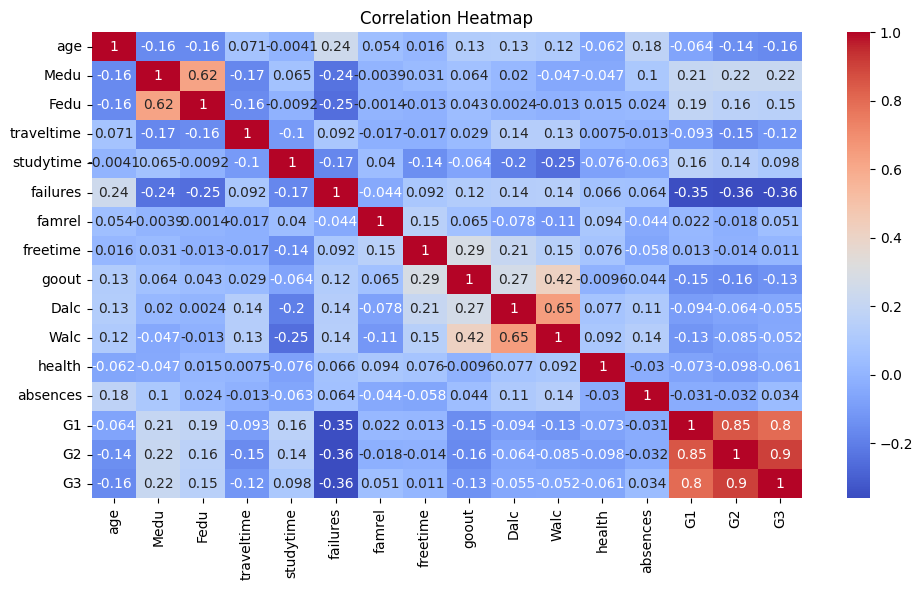

In [5]:
# correlation heatmap
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [6]:
# Encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# Separate features and target
X = df_encoded.drop('G3', axis=1)
y = df_encoded['G3']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
df_encoded.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes'],
      dtype='object')

In [8]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

In [9]:
df_pred = pd.DataFrame()
df_pred['y_test'] = y_test
df_pred['y_pred'] = y_pred
df_pred['y_diff'] = (df_pred['y_test'] - df_pred['y_pred'])
df_pred['y_diff_squared'] = df_pred['y_diff'] ** 2

mse = df_pred['y_diff_squared'].mean()

print(f'mean squared error: {mse:.2f}\nroot mean squared error: {np.sqrt(mse):.2f}\nr2_score: {r2_score(y_test, y_pred):.2f}')

mean squared error: 5.66
root mean squared error: 2.38
r2_score: 0.72


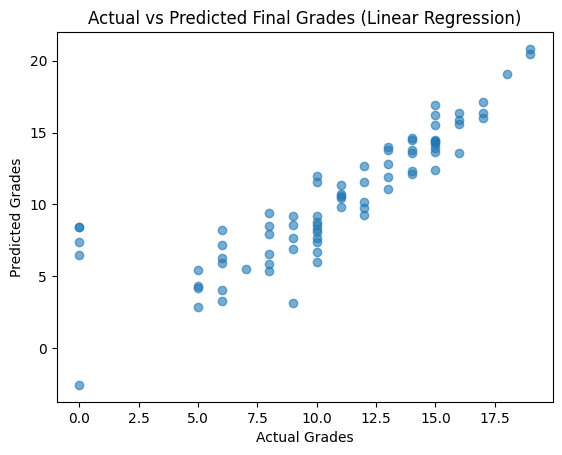

In [10]:
plt.scatter(df_pred['y_test'], df_pred['y_pred'], alpha=0.6)
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.title('Actual vs Predicted Final Grades (Linear Regression)')
plt.show()

In [24]:
from sklearn.linear_model import Lasso

l1 = Lasso(alpha = 1)
l1.fit(X_train, y_train)
print(l1.score(X_test, y_test))
print(l1.coef_)

0.796558871450581
[-0.          0.          0.          0.          0.         -0.
  0.          0.          0.         -0.          0.          0.
  0.02429958  0.07217504  0.98738451 -0.          0.          0.
  0.         -0.         -0.         -0.          0.          0.
  0.          0.         -0.          0.         -0.          0.
  0.          0.         -0.          0.          0.          0.
 -0.         -0.          0.         -0.         -0.        ]
